In [14]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data=pd.read_csv('labeledTrainData.tsv',sep='\t')

In [3]:
#reading first 10 data
data.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


PREPROCESSING

In [4]:
#shape of data
data.shape

(25000, 3)

In [5]:
#columns
data.columns

Index(['id', 'sentiment', 'review'], dtype='object')

In [6]:
#check any null values present
data.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

In [8]:
#information regarding columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [9]:
#description of data
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
#count of sentimental values
data.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

where label '1' denotes the rating >=7 and label '0' denotes the rating<5

<function matplotlib.pyplot.show(close=None, block=None)>

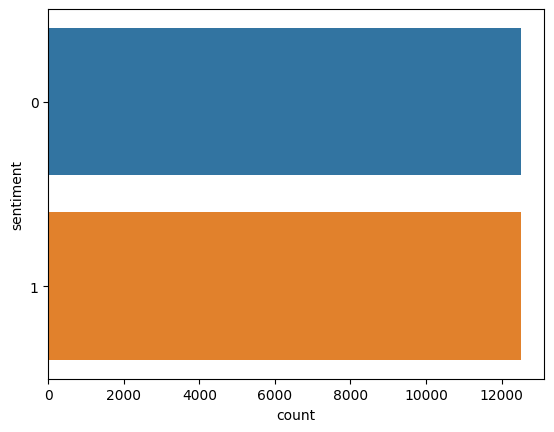

In [16]:
# Plot
sns.countplot(y='sentiment',data=data)
plt.show()

In [21]:
#importing natural language tool kit


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [24]:
from bs4 import BeautifulSoup
import re

In [25]:
#Apply function on review column
data['review'] = data['review'].apply(denoise_text)

<ipython-input-23-4ed251b70956>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [26]:
data.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [27]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\^ ^", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

In [28]:
#Apply function on review column
data['review'] = data['review'].apply(remove_special_characters)

In [29]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,The Classic War of the Worlds by Timothy Hine...
2,7759_3,0,The film starts with a manager Nicholas Bell g...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [30]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [31]:
#Apply function on review column
data['review']= data['review'].apply(simple_stemmer)

In [32]:
data.head()

,id,sentiment,review
0,5814_8,1,with all thi stuff go down at the moment with ...
1,2381_9,1,the classic war of the world by timothi hine i...
2,7759_3,0,the film start with a manag nichola bell give ...
3,3630_4,0,it must be assum that those who prais thi film...
4,9495_8,1,superbl trashi and wondrous unpretenti 80 expl...


In [ ]:
#import stopwords


In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

{"needn't", 'out', 'y', 'being', 'did', 'own', "shan't", 'any', 'those', 'which', 'couldn', 'for', 'him', 'shouldn', "that'll", 'wasn', 'about', 'yourself', 'an', 'up', 'having', 'in', 'ours', 'myself', 'to', 'most', "shouldn't", "you're", 'she', 'isn', 'itself', "you'll", 'ma', 're', 'as', 'a', 'is', 'against', 'yourselves', 'shan', "wouldn't", 'hadn', 'so', 'such', "it's", 'with', 'at', 'same', 'herself', 'has', 's', 'won', 'be', 'until', 'you', "should've", 'while', "couldn't", 'by', 'off', 'that', 'down', 'further', 'only', 'hasn', 'this', 'there', 'have', 'too', 'ourselves', 'very', 'how', 'each', 'does', "won't", "wasn't", 'o', 'who', 'here', "weren't", 'haven', "doesn't", 'than', 'once', 'hers', 'from', 'these', 'had', 'now', 'aren', 'some', 'during', "didn't", 'my', 'between', 'mightn', 'mustn', 'doesn', 'ain', "you've", 'few', 'don', 'when', 'his', 'no', 'should', 'we', 'but', 'or', 'd', "isn't", 'her', 'more', 'what', 'he', 'other', 'been', 'on', 'will', 'where', 'they', 'i',

In [41]:
from nltk.tokenize.toktok import ToktokTokenizer

In [42]:
#Tokenization of text
tokenizer1=ToktokTokenizer()

In [43]:
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [44]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer1.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [45]:
#Apply function on review column
data['review'] = data['review'].apply(remove_stopwords)

In [46]:
data.head()

,id,sentiment,review
0,5814_8,1,thi stuff go moment mj ive start listen hi mus...
1,2381_9,1,classic war world timothi hine veri entertain ...
2,7759_3,0,film start manag nichola bell give welcom inve...
3,3630_4,0,must assum prais thi film greatest film opera ...
4,9495_8,1,superbl trashi wondrous unpretenti 80 exploit ...


In [48]:
data['review']

0        thi stuff go moment mj ive start listen hi mus...
1        classic war world timothi hine veri entertain ...
2        film start manag nichola bell give welcom inve...
3        must assum prais thi film greatest film opera ...
4        superbl trashi wondrous unpretenti 80 exploit ...
                               ...                        
24995    seem like consider ha gone imdb review thi fil...
24996    dont believ made thi film complet unnecessari ...
24997    guy loser cant get girl need build pick strong...
24998    thi 30 minut documentari buuel made earli 1930...
24999    saw thi movi child broke heart stori unfinish ...
Name: review, Length: 25000, dtype: object

FEATURE EXTRACTION

In [49]:
data['review']

0        thi stuff go moment mj ive start listen hi mus...
1        classic war world timothi hine veri entertain ...
2        film start manag nichola bell give welcom inve...
3        must assum prais thi film greatest film opera ...
4        superbl trashi wondrous unpretenti 80 exploit ...
                               ...                        
24995    seem like consider ha gone imdb review thi fil...
24996    dont believ made thi film complet unnecessari ...
24997    guy loser cant get girl need build pick strong...
24998    thi 30 minut documentari buuel made earli 1930...
24999    saw thi movi child broke heart stori unfinish ...
Name: review, Length: 25000, dtype: object

In [50]:
all_words = " ".join(data['review'])

In [51]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [52]:
all_words = word_tokenize(all_words)

In [54]:
from nltk import FreqDist

In [55]:
dist = FreqDist(all_words)

In [56]:
dist

FreqDist({'thi': 73238, 'movi': 49626, 'wa': 47999, 'film': 46326, 'hi': 29240, 'one': 26324, 'like': 22075, 'ha': 16840, 'time': 15092, 'good': 14720, ...})

In [57]:
num_unique_word = len(dist)

In [58]:
num_unique_word

110996

In [59]:
r_len = []

for text in data['review']:
  word = word_tokenize(text)
  l = len(word)
  r_len.append(l)

In [60]:
import numpy as np
MAX_TWEET_LEN = np.max(r_len)

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [62]:
tokenizer = Tokenizer(num_words = num_unique_word)

In [63]:
### fit_on_texts
tokenizer.fit_on_texts(list(data['review']))

In [64]:
data.head()

,id,sentiment,review
0,5814_8,1,thi stuff go moment mj ive start listen hi mus...
1,2381_9,1,classic war world timothi hine veri entertain ...
2,7759_3,0,film start manag nichola bell give welcom inve...
3,3630_4,0,must assum prais thi film greatest film opera ...
4,9495_8,1,superbl trashi wondrous unpretenti 80 exploit ...


In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
data["review"] = tokenizer.texts_to_sequences(data['review'])

In [67]:
data.head()

,id,sentiment,review
0,5814_8,1,"[1, 491, 29, 183, 6843, 137, 95, 913, 5, 98, 1..."
1,2381_9,1,"[249, 232, 109, 3165, 5742, 13, 182, 4, 481, 2..."
2,7759_3,0,"[4, 95, 362, 3988, 2322, 65, 1826, 11819, 514,..."
3,3630_4,0,"[155, 1200, 1680, 1, 4, 743, 4, 1305, 64, 86, ..."
4,9495_8,1,"[3029, 3492, 29452, 8521, 687, 1094, 10314, 19..."


MODEL BUILDING and EVALUATING MODEL PERFORMANCE


MODEL 1


In [94]:
from tensorflow.keras.preprocessing import sequence

In [95]:
X = sequence.pad_sequences(data['review'], 38)
y = data['sentiment']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
from tensorflow.keras.models import Sequential

In [100]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

In [105]:
model = Sequential()
model.add(Embedding(input_dim = 110996, output_dim = 150, input_length = 38))

model.add(LSTM(128, dropout = 0.2 ))

model.add(Dense(1, activation = "sigmoid"))

In [106]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [107]:
history1 = model.fit(x_train, y_train, epochs = 3, batch_size = 38)

Epoch 1/3
527/527 [==============================] - 235s 441ms/step - loss: 0.4475 - accuracy: 0.7887
Epoch 2/3
527/527 [==============================] - 248s 470ms/step - loss: 0.2313 - accuracy: 0.9087
Epoch 3/3
527/527 [==============================] - 235s 446ms/step - loss: 0.1030 - accuracy: 0.9632


In [108]:
model.evaluate(x_test, y_test)

157/157 [==============================] - 4s 23ms/step - loss: 0.5360 - accuracy: 0.8064


[0.5360103845596313, 0.8064000010490417]

MODEL 2

In [109]:
from sklearn.linear_model import LogisticRegression

In [117]:
lg = LogisticRegression(max_iter =  1000)

In [118]:
lg.fit(x_train, y_train)


LogisticRegression(max_iter=2000)

In [119]:
y_pred = lg.predict(x_test)



In [120]:
from sklearn.metrics import accuracy_score


In [121]:
accuracy_score(y_test, y_pred)


0.5078

MODEKL 3

In [122]:
from sklearn.tree import DecisionTreeClassifier



In [123]:
dt = DecisionTreeClassifier()


In [124]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred = dt.predict(x_test)

In [126]:
accuracy_score(y_test, y_pred)

0.514

In [146]:
#naive bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
nb = GaussianNB()


In [129]:
nb.fit(x_train, y_train)

GaussianNB()

In [130]:
y_pred = nb.predict(x_test)


In [131]:
accuracy_score(y_test, y_pred)

0.5068